# Assignment 8: DT

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (best `depth` in range [1, 5, 10, 50], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use gridsearch cv or randomsearch cv)/simple cross validation data(you can write your own for loops refer sample solution)</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>min_sample_split</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these `false positive data points`</li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
   <li><b>Task 2: </b>For this task consider set-1 features. Select all the features which are having non-zero feature importance.You can get the feature importance using  'feature_importances_` 
   (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), discard the all other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3<br>
  Note: when you want to find the feature importance make sure you don't use max_depth parameter keep it None.
  </li>
    <br>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

In [1]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

<h1>1. Decision Tree </h1>

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Loading Data

In [3]:
project_data = pd.read_csv('train_data.csv',nrows=70000)
resource_data = pd.read_csv('resources.csv')

In [4]:
# print shape of Total data
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)



Number of data points in train data (70000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [5]:
# print top 5 rows of total project data
project_data.head()

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.   
3          45  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.   
4      172407  p104768  be1f7507a41f8479dc06f047086a39ec           Mrs.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   
2           AZ        2016-08-31 12:03:56             Grades 6-8   
3           KY        2016-10-06 21:16:17          Grades PreK-2   
4           TX        2016-07-11 01:10:09          Grades PreK-2   

            project_subject_categories     project_subject_subcategories  \
0                  Literacy & Language                     ESL, Literacy   
1    History & Civics, Health & Sports  Civics & Government, Team Sports   
2                      Health & Sports    Health & Wellness, Team Sports   
3  Literacy & Language, Math & Science             Literacy, Mathematics   
4                       Math & Science                       Mathematics   

                                       project_title  \
0   Educational Support for English Learners at Home   
1              Wanted: Projector for Hungry Learners   
2  Soccer Equipment for AWESOME Middle School Stu...   
3                             Techie Kindergarteners   
4                             Interactive Math Tools   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   
3  I work at a unique school filled with both ESL...   
4  Our second grade classroom next year will be m...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   
2  The students on the campus come to school know...             NaN   
3  My students live in high poverty conditions wi...             NaN   
4  For many students, math is a subject that does...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   
2             NaN  My students need shine guards, athletic socks,...   
3             NaN  My students need to engage in Reading and Math...   
4             NaN  My students need hands on practice in mathemat...   

   teacher_number_of_previously_posted_projects  project_is_approved  
0                                             0                    0  
1                                             7                    1  
2                                             1                    0  
3                                             4                    1  
4                                             1                    1

In [6]:
# we get the cost of the project using resource.csv file
resource_data.head(2)

id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [7]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

id   price  quantity
0  p000001  459.56         7
1  p000002  515.89        21

In [8]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

## 1.2 Text Preprocessing

## 1.2.1 Preprocessing: Project_Subject_Categories

In [9]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())

In [10]:
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

      project_subject_subcategories  \
0                     ESL, Literacy   
1  Civics & Government, Team Sports   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  price  \
0                                             0                    0  154.6   
1                                             7                    1  299.0   

   quantity              clean_categories  
0        23             Literacy_Language  
1         1  History_Civics Health_Sports

## 1.2.2 Preprocessing: Project_Subject_Subcategories

In [11]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

In [12]:
project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  price  \
0                                             0                    0  154.6   
1                                             7                    1  299.0   

   quantity              clean_categories           clean_subcategories  
0        23             Literacy_Language                  ESL Literacy  
1         1  History_Civics Health_Sports  Civics_Government TeamSports

## 1.2.3 Preprocessing: Project Essays

In [13]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [14]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [15]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [16]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [17]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [18]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [19]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [20]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 70000/70000 [00:51<00:00, 1369.84it/s]


In [21]:
# after preprocesing
preprocessed_essays[20000]

'kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism eager beavers always strive work hardest working past limitations materials ones seek students teach title school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore ever felt like ants pants needed groove move meeting kids feel time want able move learn say wobble chairs answer love develop core enhances gross motor turn fine motor skills also want learn games kids not want sit worksheets want learn count jumping playing physical engagement key success number toss color shape mats make happen students forget work fun 6 year old deserves nannan'

In [22]:
#add preprocessed_essays in to datafram
project_data['preprocessed_essays'] = preprocessed_essays
project_data.head(2)


Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2  ... project_essay_4  \
0  \"The limits of your language are the limits o...  ...             NaN   
1  The projector we need for our school is very c...  ...             NaN   

                            project_resource_summary  \
0  My students need opportunities to practice beg...   
1  My students need a projector to help with view...   

  teacher_number_of_previously_posted_projects  project_is_approved  price  \
0                                            0                    0  154.6   
1                                            7                    1  299.0   

   quantity              clean_categories           clean_subcategories  \
0        23             Literacy_Language                  ESL Literacy   
1         1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                 preprocessed_essays  
0  students english learners working english seco...  
1  students arrive school eager learn polite gene...  

[2 rows x 21 columns]

<h2><font color='red'> 1.2.4 Preprocessing of `project_title`</font></h2>

In [23]:
#print randomly

print(project_data['project_title'].values[34])
print("="*50)

\"Have A Ball!!!\"


In [24]:
# Perform text preprocessing for column Project_title

preprocessed_title = []
# tqdm is for printing the status bar
for projectsentence in tqdm(project_data['project_title'].values):
    sentence = decontracted(projectsentence)
    sentence = sentence.replace('\\r', ' ')
    sentence = sentence.replace('\\"', ' ')
    sentence = sentence.replace('\\n', ' ')
    sentence = re.sub('[^A-Za-z0-9]+', ' ', sentence)
    sentence = ' '.join(e1 for e1 in sentence.split() if e1 not in stopwords)
    preprocessed_title.append(sentence.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 70000/70000 [00:02<00:00, 29220.33it/s]


In [25]:
#After preprocessing of column Project_title
preprocessed_title[34]

'have a ball'

In [26]:
#add preprocessed_title in to datafram
project_data['preprocessed_title'] = preprocessed_title
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2  ...  \
0  \"The limits of your language are the limits o...  ...   
1  The projector we need for our school is very c...  ...   

                            project_resource_summary  \
0  My students need opportunities to practice beg...   
1  My students need a projector to help with view...   

  teacher_number_of_previously_posted_projects project_is_approved  price  \
0                                            0                   0  154.6   
1                                            7                   1  299.0   

   quantity              clean_categories           clean_subcategories  \
0        23             Literacy_Language                  ESL Literacy   
1         1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                 preprocessed_essays  \
0  students english learners working english seco...   
1  students arrive school eager learn polite gene...   

                          preprocessed_title  
0  educational support english learners home  
1           wanted projector hungry learners  

[2 rows x 22 columns]

## 1.2.5 Preprocessing Teacher_prefix

In [27]:
#Fill null to NAN in teacher_prefix
# pandas change null to nan https://www.geeksforgeeks.org/python-pandas-dataframe-fillna-to-replace-null-values-in-dataframe/

project_data.teacher_prefix.fillna("Nan", inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2  ...  \
0  \"The limits of your language are the limits o...  ...   
1  The projector we need for our school is very c...  ...   

                            project_resource_summary  \
0  My students need opportunities to practice beg...   
1  My students need a projector to help with view...   

  teacher_number_of_previously_posted_projects project_is_approved  price  \
0                                            0                   0  154.6   
1                                            7                   1  299.0   

   quantity              clean_categories           clean_subcategories  \
0        23             Literacy_Language                  ESL Literacy   
1         1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                 preprocessed_essays  \
0  students english learners working english seco...   
1  students arrive school eager learn polite gene...   

                          preprocessed_title  
0  educational support english learners home  
1           wanted projector hungry learners  

[2 rows x 22 columns]

In [28]:
teacherprefix = list(project_data['teacher_prefix'].values)

teacher_prefix_list = []
for i in teacherprefix:
    temp=""
    temp = i.replace(".","") #replace dot with null and append to prefix list
    teacher_prefix_list.append(temp.strip()) 

In [29]:
project_data['clean_teacher_prefix'] = teacher_prefix_list
project_data.drop(['teacher_prefix'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id school_state  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           IN   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a           FL   

  project_submitted_datetime project_grade_category  \
0        2016-12-05 13:43:57          Grades PreK-2   
1        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  ...  \
0  \"The limits of your language are the limits o...             NaN  ...   
1  The projector we need for our school is very c...             NaN  ...   

  teacher_number_of_previously_posted_projects project_is_approved  price  \
0                                            0                   0  154.6   
1                                            7                   1  299.0   

   quantity              clean_categories           clean_subcategories  \
0        23             Literacy_Language                  ESL Literacy   
1         1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                 preprocessed_essays  \
0  students english learners working english seco...   
1  students arrive school eager learn polite gene...   

                          preprocessed_title clean_teacher_prefix  
0  educational support english learners home                  Mrs  
1           wanted projector hungry learners                   Mr  

[2 rows x 22 columns]

## 1.2.6 Preprocessing Project_Grade

In [30]:
clean_grade_catogories = list(project_data['project_grade_category'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_grade_list = []
for i in clean_grade_catogories:
    temp = ""
    temp = i.replace("-","_")
    temp = temp.replace(" ","_")
    sub_grade_list.append(temp.strip())

In [31]:
project_data['clean_grade_catogories'] = sub_grade_list
project_data.drop(['project_grade_category'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id school_state  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           IN   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a           FL   

  project_submitted_datetime  \
0        2016-12-05 13:43:57   
1        2016-10-25 09:22:10   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4  ... project_is_approved  price  quantity  \
0             NaN  ...                   0  154.6        23   
1             NaN  ...                   1  299.0         1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                 preprocessed_essays  \
0  students english learners working english seco...   
1  students arrive school eager learn polite gene...   

                          preprocessed_title clean_teacher_prefix  \
0  educational support english learners home                  Mrs   
1           wanted projector hungry learners                   Mr   

  clean_grade_catogories  
0          Grades_PreK_2  
1             Grades_6_8  

[2 rows x 22 columns]

## 1.2.7 Sentiment Scores of each of the Essay

In [32]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

polarity_essays = project_data['essay']
essay_sentiment_neg=[]
essay_sentiment_neu=[]
essay_sentiment_pos=[]
essay_sentiment_compound=[]
for i in tqdm(polarity_essays):
    result = sid.polarity_scores(i)
    essay_sentiment_neg.append(result["neg"])
    essay_sentiment_neu.append(result["neu"])
    essay_sentiment_pos.append(result["pos"])
    essay_sentiment_compound.append(result["compound"])

100%|███████████████████████████████████████████████████████████████████████████| 70000/70000 [04:26<00:00, 262.78it/s]


In [33]:
project_data['essay_sentiment_neg']=essay_sentiment_neg
project_data['essay_sentiment_neu']=essay_sentiment_neu
project_data['essay_sentiment_pos']=essay_sentiment_pos
project_data['essay_sentiment_compound']=essay_sentiment_compound

In [34]:
project_data.head(2)

Unnamed: 0       id                        teacher_id school_state  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           IN   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a           FL   

  project_submitted_datetime  \
0        2016-12-05 13:43:57   
1        2016-10-25 09:22:10   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4  ...           clean_subcategories  \
0             NaN  ...                  ESL Literacy   
1             NaN  ...  Civics_Government TeamSports   

                                               essay  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                 preprocessed_essays  \
0  students english learners working english seco...   
1  students arrive school eager learn polite gene...   

                          preprocessed_title  clean_teacher_prefix  \
0  educational support english learners home                   Mrs   
1           wanted projector hungry learners                    Mr   

  clean_grade_catogories essay_sentiment_neg essay_sentiment_neu  \
0          Grades_PreK_2               0.008               0.911   
1             Grades_6_8               0.037               0.851   

  essay_sentiment_pos essay_sentiment_compound  
0               0.081                   0.9611  
1               0.112                   0.9267  

[2 rows x 26 columns]

## 1.2.8 Number of words in the title

In [35]:
number_of_words_projecttitle = []
numberofwordsprojecttitle = project_data["preprocessed_title"]
for j in (numberofwordsprojecttitle):
    number_of_words_projecttitle.append(len(j.split()))
project_data['number_of_words_project_title']=number_of_words_projecttitle


In [36]:
project_data.head(2)

Unnamed: 0       id                        teacher_id school_state  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           IN   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a           FL   

  project_submitted_datetime  \
0        2016-12-05 13:43:57   
1        2016-10-25 09:22:10   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4  ...                                              essay  \
0             NaN  ...  My students are English learners that are work...   
1             NaN  ...  Our students arrive to our school eager to lea...   

                                 preprocessed_essays  \
0  students english learners working english seco...   
1  students arrive school eager learn polite gene...   

                          preprocessed_title  clean_teacher_prefix  \
0  educational support english learners home                   Mrs   
1           wanted projector hungry learners                    Mr   

   clean_grade_catogories essay_sentiment_neg essay_sentiment_neu  \
0           Grades_PreK_2               0.008               0.911   
1              Grades_6_8               0.037               0.851   

  essay_sentiment_pos essay_sentiment_compound number_of_words_project_title  
0               0.081                   0.9611                             5  
1               0.112                   0.9267                             4  

[2 rows x 27 columns]

## 1.2.9 Number of words in combined essays

In [37]:
number_of_words_essay = []
numberofwordsessay = project_data["preprocessed_essays"]
for j in (numberofwordsessay):
    number_of_words_essay.append(len(j.split()))
project_data['number_of_words_essay']=number_of_words_essay

In [38]:
project_data.head(2)

Unnamed: 0       id                        teacher_id school_state  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           IN   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a           FL   

  project_submitted_datetime  \
0        2016-12-05 13:43:57   
1        2016-10-25 09:22:10   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4  ...                                preprocessed_essays  \
0             NaN  ...  students english learners working english seco...   
1             NaN  ...  students arrive school eager learn polite gene...   

                          preprocessed_title  clean_teacher_prefix  \
0  educational support english learners home                   Mrs   
1           wanted projector hungry learners                    Mr   

   clean_grade_catogories  essay_sentiment_neg essay_sentiment_neu  \
0           Grades_PreK_2                0.008               0.911   
1              Grades_6_8                0.037               0.851   

  essay_sentiment_pos essay_sentiment_compound number_of_words_project_title  \
0               0.081                   0.9611                             5   
1               0.112                   0.9267                             4   

  number_of_words_essay  
0                   149  
1                    99  

[2 rows x 28 columns]

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [39]:
# extract data column project_is_approved from total_project_data and add it to variable y
# remove project_is_approved from total_project_data and store the data in to variable X
y = project_data['project_is_approved'].values
project_data.drop(['project_is_approved'], axis=1, inplace=True)
project_data.drop(['project_essay_2'], axis=1, inplace=True)
project_data.drop(['project_essay_3'], axis=1, inplace=True)
project_data.drop(['project_essay_4'], axis=1, inplace=True)
X = project_data
X.head(1)

Unnamed: 0       id                        teacher_id school_state  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           IN   

  project_submitted_datetime  \
0        2016-12-05 13:43:57   

                                      project_title  \
0  Educational Support for English Learners at Home   

                                     project_essay_1  \
0  My students are English learners that are work...   

                            project_resource_summary  \
0  My students need opportunities to practice beg...   

   teacher_number_of_previously_posted_projects  price  ...  \
0                                             0  154.6  ...   

                                 preprocessed_essays  \
0  students english learners working english seco...   

                          preprocessed_title clean_teacher_prefix  \
0  educational support english learners home                  Mrs   

  clean_grade_catogories essay_sentiment_neg essay_sentiment_neu  \
0          Grades_PreK_2               0.008               0.911   

  essay_sentiment_pos essay_sentiment_compound  number_of_words_project_title  \
0               0.081                   0.9611                              5   

   number_of_words_essay  
0                    149  

[1 rows x 24 columns]

In [40]:
#split the data in to train and cross validation and test before performing BOW, TFIDF
# train test split
from sklearn.model_selection import train_test_split
#splitting data in to train and test with 33 percentage as test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
#splitting train data in to train and cv with 33 percentage as cv data
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

In [41]:
#print after split data in to train, cv and test
print("Number of data points in X_train data", X_train.shape)
print('-'*50)
print("Number of data points in X_test data", X_test.shape)
print('-'*50)
print("Number of data points in Y_train data", y_train.shape)
print('-'*50)
print("Number of data points in Y_test data", y_test.shape)
print('-'*50)
print("Number of data points in X_cv data", X_cv.shape)
print('-'*50)
print("Number of data points in Y_cv data", y_cv.shape)
print('-'*50)

Number of data points in X_train data (31423, 24)
--------------------------------------------------
Number of data points in X_test data (23100, 24)
--------------------------------------------------
Number of data points in Y_train data (31423,)
--------------------------------------------------
Number of data points in Y_test data (23100,)
--------------------------------------------------
Number of data points in X_cv data (15477, 24)
--------------------------------------------------
Number of data points in Y_cv data (15477,)
--------------------------------------------------


<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

### Vectorizing Categorical data

<h3>Encoding categorical feature: School State</h3>

In [42]:
#Perform One hot code to School State
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(31423, 51) (31423,)
(15477, 51) (15477,)
(23100, 51) (23100,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


<h3>Encoding categorical feature: Teacher_prefix State</h3>

In [43]:
#Perform One hot code to Teacher prefix
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(X_train['clean_teacher_prefix'].values)
X_cv_teacher_ohe = vectorizer.transform(X_cv['clean_teacher_prefix'].values)
X_test_teacher_ohe = vectorizer.transform(X_test['clean_teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(31423, 5) (31423,)
(15477, 5) (15477,)
(23100, 5) (23100,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


<h3>Encoding categorical feature: Project Grade Category</h3>

In [44]:
#Perform One hot code to Project Grade

vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_grade_catogories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer.transform(X_train['clean_grade_catogories'].values)
X_cv_grade_ohe = vectorizer.transform(X_cv['clean_grade_catogories'].values)
X_test_grade_ohe = vectorizer.transform(X_test['clean_grade_catogories'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(31423, 4) (31423,)
(15477, 4) (15477,)
(23100, 4) (23100,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


<h3>Encoding categorical feature: Project Categories</h3>

In [45]:
#Perform One hot code to Project Categories
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_cleanc_ohe = vectorizer.transform(X_train['clean_categories'].values)
X_cv_cleanc_ohe = vectorizer.transform(X_cv['clean_categories'].values)
X_test_cleanc_ohe = vectorizer.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_cleanc_ohe.shape, y_train.shape)
print(X_cv_cleanc_ohe.shape, y_cv.shape)
print(X_test_cleanc_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(31423, 9) (31423,)
(15477, 9) (15477,)
(23100, 9) (23100,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


<h3>Encoding categorical feature: Project Sub Categories</h3>

In [46]:
#Perform One hot code to Project Sub Categories
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_cleansub_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
X_cv_cleansub_ohe = vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_cleansub_ohe = vectorizer.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_cleansub_ohe.shape, y_train.shape)
print(X_cv_cleansub_ohe.shape, y_cv.shape)
print(X_test_cleansub_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(31423, 30) (31423,)
(15477, 30) (15477,)
(23100, 30) (23100,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


<h3>Encoding Numerical Feature: Teacher Number of Previously Posted </h3>

In [47]:
X_train.head(2)

Unnamed: 0       id                        teacher_id school_state  \
42742       83067  p128574  877e1e849eceb20fb0002774bcd08d91           IN   
30283        5053  p235881  fa005d91b24d49003edf08db7298199c           CA   

      project_submitted_datetime                               project_title  \
42742        2016-07-03 15:27:49  A Little Color Makes Everything Intersting   
30283        2016-05-29 17:56:01       A Listening Center For Little Readers   

                                         project_essay_1  \
42742  My 10th grade English class is comprised of re...   
30283  Most of my students do not speak English, have...   

                                project_resource_summary  \
42742  My students need color in their lives to grab ...   
30283  My students need a CD player and a set of read...   

       teacher_number_of_previously_posted_projects   price  ...  \
42742                                             1   25.29  ...   
30283                                            17  171.85  ...   

                                     preprocessed_essays  \
42742  10th grade english class comprised regular inc...   
30283  students not speak english never school majori...   

                               preprocessed_title clean_teacher_prefix  \
42742  a little color makes everything intersting                  Mrs   
30283       a listening center for little readers                   Ms   

      clean_grade_catogories essay_sentiment_neg essay_sentiment_neu  \
42742            Grades_9_12               0.009               0.768   
30283          Grades_PreK_2               0.059               0.788   

      essay_sentiment_pos essay_sentiment_compound  \
42742               0.223                   0.9924   
30283               0.153                   0.9809   

       number_of_words_project_title  number_of_words_essay  
42742                              6                    116  
30283                              6                    127  

[2 rows x 24 columns]

In [49]:
#Standardize numberical feature : Teacher Number of previously posted projects
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_teacherposted_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_cv_teacherposted_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_teacherposted_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

print("After vectorizations")
print(X_train_teacherposted_norm.shape, y_train.shape)
print(X_cv_teacherposted_norm.shape, y_cv.shape)
print(X_test_teacherposted_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(1, 31423) (31423,)
(1, 15477) (15477,)
(1, 23100) (23100,)


<h3>Encoding Numerical Feature: Essay Sentiment neg,neu,pos,compound </h3>

In [50]:
#Standardize numberical feature : essay sentiment neg
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['essay_sentiment_neg'].values.reshape(1,-1))

X_train_essay_sentiment_neg = normalizer.transform(X_train['essay_sentiment_neg'].values.reshape(1,-1))
X_cv_essay_sentiment_neg = normalizer.transform(X_cv['essay_sentiment_neg'].values.reshape(1,-1))
X_test_essay_sentiment_neg = normalizer.transform(X_test['essay_sentiment_neg'].values.reshape(1,-1))

print("neg After vectorizations")
print(X_train_essay_sentiment_neg.shape, y_train.shape)
print(X_cv_essay_sentiment_neg.shape, y_cv.shape)
print(X_test_essay_sentiment_neg.shape, y_test.shape)
print("="*100)



#Standardize numberical feature : essay sentiment neu

normalizer = Normalizer()
normalizer.fit(X_train['essay_sentiment_neu'].values.reshape(1,-1))

X_train_essay_sentiment_neu = normalizer.transform(X_train['essay_sentiment_neu'].values.reshape(1,-1))
X_cv_essay_sentiment_neu = normalizer.transform(X_cv['essay_sentiment_neu'].values.reshape(1,-1))
X_test_essay_sentiment_neu = normalizer.transform(X_test['essay_sentiment_neu'].values.reshape(1,-1))

print("neu After vectorizations")
print(X_train_essay_sentiment_neu.shape, y_train.shape)
print(X_cv_essay_sentiment_neu.shape, y_cv.shape)
print(X_test_essay_sentiment_neu.shape, y_test.shape)
print("="*100)

#Standardize numberical feature : essay sentiment pos

normalizer = Normalizer()
normalizer.fit(X_train['essay_sentiment_pos'].values.reshape(1,-1))

X_train_essay_sentiment_pos = normalizer.transform(X_train['essay_sentiment_pos'].values.reshape(1,-1))
X_cv_essay_sentiment_pos = normalizer.transform(X_cv['essay_sentiment_pos'].values.reshape(1,-1))
X_test_essay_sentiment_pos = normalizer.transform(X_test['essay_sentiment_pos'].values.reshape(1,-1))

print("pos After vectorizations")
print(X_train_essay_sentiment_pos.shape, y_train.shape)
print(X_cv_essay_sentiment_pos.shape, y_cv.shape)
print(X_test_essay_sentiment_pos.shape, y_test.shape)
print("="*100)


#Standardize numberical feature : essay sentiment compound
normalizer = Normalizer()
normalizer.fit(X_train['essay_sentiment_compound'].values.reshape(1,-1))

X_train_essay_sentiment_compound = normalizer.transform(X_train['essay_sentiment_compound'].values.reshape(1,-1))
X_cv_essay_sentiment_compound = normalizer.transform(X_cv['essay_sentiment_compound'].values.reshape(1,-1))
X_test_essay_sentiment_compound = normalizer.transform(X_test['essay_sentiment_compound'].values.reshape(1,-1))

print("compound After vectorizations")
print(X_train_essay_sentiment_compound.shape, y_train.shape)
print(X_cv_essay_sentiment_compound.shape, y_cv.shape)
print(X_test_essay_sentiment_compound.shape, y_test.shape)
print("="*100)

neg After vectorizations
(1, 31423) (31423,)
(1, 15477) (15477,)
(1, 23100) (23100,)
neu After vectorizations
(1, 31423) (31423,)
(1, 15477) (15477,)
(1, 23100) (23100,)
pos After vectorizations
(1, 31423) (31423,)
(1, 15477) (15477,)
(1, 23100) (23100,)
compound After vectorizations
(1, 31423) (31423,)
(1, 15477) (15477,)
(1, 23100) (23100,)


<h3>Encoding Numerical Feature: Number of words in title and combine essays </h3>

In [51]:
#Standardize numberical feature : essay sentiment neg
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['number_of_words_project_title'].values.reshape(1,-1))

X_train_number_of_words_project_title = normalizer.transform(X_train['number_of_words_project_title'].values.reshape(1,-1))
X_cv_number_of_words_project_title = normalizer.transform(X_cv['number_of_words_project_title'].values.reshape(1,-1))
X_test_number_of_words_project_title = normalizer.transform(X_test['number_of_words_project_title'].values.reshape(1,-1))

print("Number of words in project title After vectorizations")
print(X_train_number_of_words_project_title.shape, y_train.shape)
print(X_cv_number_of_words_project_title.shape, y_cv.shape)
print(X_test_number_of_words_project_title.shape, y_test.shape)
print("="*100)



#Standardize numberical feature : number of words in essay

normalizer = Normalizer()
normalizer.fit(X_train['number_of_words_essay'].values.reshape(1,-1))

X_train_number_of_words_essay = normalizer.transform(X_train['number_of_words_essay'].values.reshape(1,-1))
X_cv_number_of_words_essay = normalizer.transform(X_cv['number_of_words_essay'].values.reshape(1,-1))
X_test_number_of_words_essay = normalizer.transform(X_test['number_of_words_essay'].values.reshape(1,-1))

print("Number of words in Essay After vectorizations")
print(X_train_number_of_words_essay.shape, y_train.shape)
print(X_cv_number_of_words_essay.shape, y_cv.shape)
print(X_test_number_of_words_essay.shape, y_test.shape)
print("="*100)



Number of words in project title After vectorizations
(1, 31423) (31423,)
(1, 15477) (15477,)
(1, 23100) (23100,)
Number of words in Essay After vectorizations
(1, 31423) (31423,)
(1, 15477) (15477,)
(1, 23100) (23100,)


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

<h3>Vectorizing Text data</h3>

<h3>Encoding Text data: Project Essay (TFIDF) </h3>

In [52]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)


vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['preprocessed_essays'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf = vectorizer.transform(X_train['preprocessed_essays'].values)
X_cv_essay_tfidf = vectorizer.transform(X_cv['preprocessed_essays'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['preprocessed_essays'].values)

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)

(31423, 24) (31423,)
(15477, 24) (15477,)
(23100, 24) (23100,)
After vectorizations
(31423, 5000) (31423,)
(15477, 5000) (15477,)
(23100, 5000) (23100,)


<h3>Encoding Text data: Project_title (TFIDF) </h3>

In [53]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)


vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4))
vectorizer.fit(X_train['preprocessed_title'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_pt_tfidf = vectorizer.transform(X_train['preprocessed_title'].values)
X_cv_pt_tfidf = vectorizer.transform(X_cv['preprocessed_title'].values)
X_test_pt_tfidf = vectorizer.transform(X_test['preprocessed_title'].values)

print("After vectorizations")
print(X_train_pt_tfidf.shape, y_train.shape)
print(X_cv_pt_tfidf.shape, y_cv.shape)
print(X_test_pt_tfidf.shape, y_test.shape)
print("="*100)

(31423, 24) (31423,)
(15477, 24) (15477,)
(23100, 24) (23100,)
After vectorizations
(31423, 2717) (31423,)
(15477, 2717) (15477,)
(23100, 2717) (23100,)


<h3>Encoding Text data: Project Essay (TFIDF W2V) </h3>

In [54]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer(max_features=5000)
tfidf_model.fit(X_train['preprocessed_essays'])
tfidf_model.transform(X_train['preprocessed_essays'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [56]:

# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
#Output:
    
#Loading Glove Model
#1917495it [06:32, 4879.69it/s]
#Done. 1917495  words loaded!

# ============================


Loading Glove Model


1917495it [06:32, 4887.65it/s]


Done. 1917495  words loaded!


In [57]:
#Apply glove model to "Train_Preprocessed_essay"
words = []
for i in X_train['preprocessed_essays']:
    words.extend(i.split(' '))

print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))


inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)

all the words in the coupus 4341195
the unique words in the coupus 34791
The number of words that are present in both glove vectors and our coupus 32407 ( 93.148 %)
word 2 vec length 32407


In [58]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [59]:
X_train_tfidf_w2v_essay = []; 
for sentence in tqdm(X_train['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_train_tfidf_w2v_essay.append(vector)

print(len(X_train_tfidf_w2v_essay))
print(len(X_train_tfidf_w2v_essay[0]))

100%|███████████████████████████████████████████████████████████████████████████| 31423/31423 [01:29<00:00, 352.76it/s]


31423
300


In [60]:
# X_CV data

tfidf_model.transform(X_cv['preprocessed_essays'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())


X_cv_tfidf_w2v_essay = []; 
for sentence in tqdm(X_cv['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_cv_tfidf_w2v_essay.append(vector)

print(len(X_cv_tfidf_w2v_essay))
print(len(X_cv_tfidf_w2v_essay[0]))

100%|███████████████████████████████████████████████████████████████████████████| 15477/15477 [00:42<00:00, 360.24it/s]


15477
300


In [61]:
# X_test data

tfidf_model.transform(X_test['preprocessed_essays'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())


# average Word2Vec
# compute average word2vec for each review.
X_test_tfidf_w2v_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_test_tfidf_w2v_essay.append(vector)

print(len(X_test_tfidf_w2v_essay))
print(len(X_test_tfidf_w2v_essay[0]))

100%|███████████████████████████████████████████████████████████████████████████| 23100/23100 [01:09<00:00, 334.58it/s]


23100
300


<h3>Encoding Text data: Project Title (TFIDF W2V) </h3>

In [62]:
# X_train data
tfidf_model_title = TfidfVectorizer(max_features=5000)
tfidf_model_title.fit(X_train['preprocessed_title'])
tfidf_model_title.transform(X_train['preprocessed_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model_title.get_feature_names(), list(tfidf_model_title.idf_)))
tfidf_words = set(tfidf_model_title.get_feature_names())


X_train_tfidf_w2v_title = []; 
for sentence in tqdm(X_train['preprocessed_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_train_tfidf_w2v_title.append(vector)

print(len(X_train_tfidf_w2v_title))
print(len(X_train_tfidf_w2v_title[0]))

100%|█████████████████████████████████████████████████████████████████████████| 31423/31423 [00:01<00:00, 20714.66it/s]


31423
300


In [63]:
# X_cv data

tfidf_model_title.transform(X_cv['preprocessed_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model_title.get_feature_names(), list(tfidf_model_title.idf_)))
tfidf_words = set(tfidf_model_title.get_feature_names())


X_cv_tfidf_w2v_title = []; 
for sentence in tqdm(X_cv['preprocessed_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_cv_tfidf_w2v_title.append(vector)

print(len(X_cv_tfidf_w2v_title))
print(len(X_cv_tfidf_w2v_title[0]))

100%|█████████████████████████████████████████████████████████████████████████| 15477/15477 [00:00<00:00, 22296.62it/s]


15477
300


In [64]:
# X_test data

tfidf_model_title.transform(X_test['preprocessed_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model_title.get_feature_names(), list(tfidf_model_title.idf_)))
tfidf_words = set(tfidf_model_title.get_feature_names())


X_test_tfidf_w2v_title = []; 
for sentence in tqdm(X_test['preprocessed_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_test_tfidf_w2v_title.append(vector)

print(len(X_test_tfidf_w2v_title))
print(len(X_test_tfidf_w2v_title[0]))

100%|█████████████████████████████████████████████████████████████████████████| 23100/23100 [00:00<00:00, 24406.50it/s]


23100
300


### Vectorizing Numerical data


<h3>Encoding Numerical feature: Price</h3>

In [66]:
#Standardize numberical feature : Price
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(1,-1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(1,-1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(1,-1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1,-1))

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(1, 31423) (31423,)
(1, 15477) (15477,)
(1, 23100) (23100,)


<h3>Encoding Numerical Feature: Teacher Number of Previously Posted </h3>

In [67]:
#Standardize numberical feature : Teacher Number of previously posted projects
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_teacherposted_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_cv_teacherposted_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_teacherposted_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

print("After vectorizations")
print(X_train_teacherposted_norm.shape, y_train.shape)
print(X_cv_teacherposted_norm.shape, y_cv.shape)
print(X_test_teacherposted_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(1, 31423) (31423,)
(1, 15477) (15477,)
(1, 23100) (23100,)


<h2>1.5 Appling  Decision Tree on different kind of featurization as mentioned in the instructions</h2>

<br>Apply  Decision Tree on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 2.4.1 Applying DT on TFIDF,<font color='red'> SET 1</font>

### Concatinating all the features for SET 1

In [68]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tfidf_tr = hstack((X_train_essay_sentiment_neg.T,X_train_essay_sentiment_neu.T,X_train_essay_sentiment_pos.T,X_train_essay_sentiment_compound.T,X_train_number_of_words_project_title.T,X_train_number_of_words_essay.T,X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_cleanc_ohe, X_train_cleansub_ohe , X_train_price_norm.T , X_train_teacherposted_norm.T,X_train_essay_tfidf,X_train_pt_tfidf)).tocsr()
X_tfidf_cr = hstack((X_cv_essay_sentiment_neg.T,X_cv_essay_sentiment_neu.T,X_cv_essay_sentiment_pos.T,X_cv_essay_sentiment_compound.T,X_cv_number_of_words_project_title.T,X_cv_number_of_words_essay.T,X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_cleanc_ohe, X_cv_cleansub_ohe , X_cv_price_norm.T , X_cv_teacherposted_norm.T,X_cv_essay_tfidf,X_cv_pt_tfidf)).tocsr()
X_tfidf_te = hstack((X_test_essay_sentiment_neg.T,X_test_essay_sentiment_neu.T,X_test_essay_sentiment_pos.T,X_test_essay_sentiment_compound.T,X_test_number_of_words_project_title.T,X_test_number_of_words_essay.T,X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_cleanc_ohe, X_test_cleansub_ohe , X_test_price_norm.T , X_test_teacherposted_norm.T,X_test_essay_tfidf,X_test_pt_tfidf)).tocsr()

print("Final Data matrix")
print(X_tfidf_tr.shape, y_train.shape)
print(X_tfidf_cr.shape, y_cv.shape)
print(X_tfidf_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(31423, 7824) (31423,)
(15477, 7824) (15477,)
(23100, 7824) (23100,)


### Applying DT on SET1

In [69]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

parametersK = {'max_depth':[1,5,10,50],'min_samples_split':[5,10,100,500]}
tfidfneigh = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'), parametersK, cv=3, scoring = 'roc_auc',return_train_score=True)
tfidfneigh.fit(X_tfidf_tr,y_train)
tfidfneigh.cv_results_

{'mean_fit_time': array([ 0.62301064,  0.59839773,  0.60837261,  0.61302773,  2.69312938,
         2.67983166,  2.5993789 ,  3.09671696,  6.56078672,  6.35865752,
         5.66051698,  4.63394769, 25.46660161, 25.32357216, 21.51538905,
        11.74799069]),
 'std_fit_time': array([0.02394548, 0.00373119, 0.01264125, 0.01262367, 0.12526226,
        0.08332762, 0.03257757, 0.50352654, 0.13721741, 0.11994745,
        0.16647319, 0.05899101, 0.94044197, 0.5247646 , 0.40536715,
        1.27290741]),
 'mean_score_time': array([0.0285898 , 0.02727191, 0.0256176 , 0.02629153, 0.02726491,
        0.02529589, 0.02661522, 0.03126073, 0.02496076, 0.0252773 ,
        0.0262843 , 0.02527618, 0.02534223, 0.02934464, 0.02798812,
        0.02667618]),
 'std_score_time': array([3.67472853e-03, 2.61534157e-03, 4.65577747e-04, 1.88166046e-03,
        4.67980076e-04, 4.70247445e-04, 2.33808335e-03, 3.74820353e-03,
        2.53068341e-06, 4.63509769e-04, 1.88833625e-03, 4.83005718e-04,
        1.89863127e-

In [70]:
p2=pd.DataFrame(tfidfneigh.cv_results_)
p2
#ax

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.623011      0.023945         0.028590        0.003675   
1        0.598398      0.003731         0.027272        0.002615   
2        0.608373      0.012641         0.025618        0.000466   
3        0.613028      0.012624         0.026292        0.001882   
4        2.693129      0.125262         0.027265        0.000468   
5        2.679832      0.083328         0.025296        0.000470   
6        2.599379      0.032578         0.026615        0.002338   
7        3.096717      0.503527         0.031261        0.003748   
8        6.560787      0.137217         0.024961        0.000003   
9        6.358658      0.119947         0.025277        0.000464   
10       5.660517      0.166473         0.026284        0.001888   
11       4.633948      0.058991         0.025276        0.000483   
12      25.466602      0.940442         0.025342        0.001899   
13      25.323572      0.524765         0.029345        0.001877   
14      21.515389      0.405367         0.027988        0.003277   
15      11.747991      1.272907         0.026676        0.001872   

   param_max_depth param_min_samples_split  \
0                1                       5   
1                1                      10   
2                1                     100   
3                1                     500   
4                5                       5   
5                5                      10   
6                5                     100   
7                5                     500   
8               10                       5   
9               10                      10   
10              10                     100   
11              10                     500   
12              50                       5   
13              50                      10   
14              50                     100   
15              50                     500   

                                         params  split0_test_score  \
0      {'max_depth': 1, 'min_samples_split': 5}           0.546663   
1     {'max_depth': 1, 'min_samples_split': 10}           0.546663   
2    {'max_depth': 1, 'min_samples_split': 100}           0.546663   
3    {'max_depth': 1, 'min_samples_split': 500}           0.546663   
4      {'max_depth': 5, 'min_samples_split': 5}           0.623850   
5     {'max_depth': 5, 'min_samples_split': 10}           0.623576   
6    {'max_depth': 5, 'min_samples_split': 100}           0.623420   
7    {'max_depth': 5, 'min_samples_split': 500}           0.623568   
8     {'max_depth': 10, 'min_samples_split': 5}           0.632799   
9    {'max_depth': 10, 'min_samples_split': 10}           0.630652   
10  {'max_depth': 10, 'min_samples_split': 100}           0.637592   
11  {'max_depth': 10, 'min_samples_split': 500}           0.642666   
12    {'max_depth': 50, 'min_samples_split': 5}           0.561558   
13   {'max_depth': 50, 'min_samples_split': 10}           0.559269   
14  {'max_depth': 50, 'min_samples_split': 100}           0.591970   
15  {'max_depth': 50, 'min_samples_split': 500}           0.614239   

    split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0            0.548079           0.544693         0.546478        0.001388   
1            0.548079           0.544693         0.546478        0.001388   
2            0.548079           0.544693         0.546478        0.001388   
3            0.548079           0.544693         0.546478        0.001388   
4            0.609636           0.624905         0.619464        0.006962   
5            0.609636           0.624905         0.619373        0.006906   
6            0.608607           0.623731         0.618586        0.007057   
7            0.609566           0.628102         0.620412        0.007889   
8            0.621494           0.629009         0.627767        0.004698   
9            0.618316           0.627543         0.625504        0.005238   
10           0.619484     

In [71]:
# seaborn heatmap gridsearchcv https://stackoverflow.com/questions/48791709/how-to-plot-a-heat-map-on-pivot-table-after-grid-search

testscore=pd.pivot_table(pd.DataFrame(tfidfneigh.cv_results_),values='mean_test_score',index='param_max_depth',columns='param_min_samples_split')
print("Mean Test Score")
testscore

Mean Test Score


param_min_samples_split       5         10        100       500
param_max_depth                                                
1                        0.546478  0.546478  0.546478  0.546478
5                        0.619464  0.619373  0.618586  0.620412
10                       0.627767  0.625504  0.627176  0.638598
50                       0.560432  0.563945  0.583167  0.608376

In [72]:
# seaborn heatmap gridsearchcv https://stackoverflow.com/questions/48791709/how-to-plot-a-heat-map-on-pivot-table-after-grid-search

trainscore=pd.pivot_table(pd.DataFrame(tfidfneigh.cv_results_),values='mean_train_score',index='param_max_depth',columns='param_min_samples_split')
print("Mean Train SCore")
trainscore

Mean Train SCore


param_min_samples_split       5         10        100       500
param_max_depth                                                
1                        0.551390  0.551390  0.551390  0.551390
5                        0.665312  0.665218  0.663399  0.658327
10                       0.783161  0.780763  0.752846  0.720902
50                       0.985122  0.977173  0.926950  0.835389

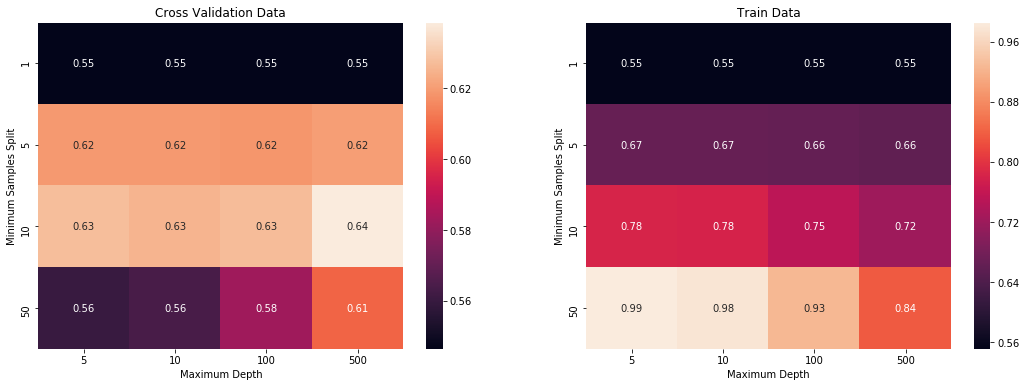

In [73]:
# seaborn heatmap gridsearchcv https://stackoverflow.com/questions/48791709/how-to-plot-a-heat-map-on-pivot-table-after-grid-search

#testscore = pd.pivot_table(pd.DataFrame(tfidfneigh.cv_results_),
#    values='mean_test_score', index='param_max_depth', columns='param_min_samples_split')

#trainscore = pd.pivot_table(pd.DataFrame(tfidfneigh.cv_results_),
#    values='mean_train_score', index='param_max_depth', columns='param_min_samples_split')

# print sns plot multiple plots  https://stackoverflow.com/questions/38082602/plotting-multiple-different-plots-in-one-figure-using-seaborn
fig, axs = plt.subplots(ncols=2,figsize=(18,6))
sns.heatmap(testscore,annot = True,ax=axs[0])
sns.heatmap(trainscore,annot = True,ax=axs[1])

axs[0].set(title='Cross Validation Data',xlabel='Maximum Depth', ylabel='Minimum Samples Split')
axs[1].set(title='Train Data',xlabel='Maximum Depth', ylabel='Minimum Samples Split')

plt.show()


In [74]:
tfidfneigh.best_params_

{'max_depth': 10, 'min_samples_split': 500}

### Find AUC on test and train data

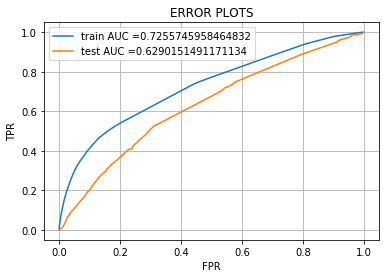

In [75]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


tfidfneigh_auc = DecisionTreeClassifier(class_weight='balanced',max_depth=10,min_samples_split=500)
tfidfneigh_auc.fit(X_tfidf_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_tfidf_pred = tfidfneigh_auc.predict_proba(X_tfidf_tr)[:, 1]
y_test_tfidf_pred = tfidfneigh_auc.predict_proba(X_tfidf_te)[:, 1]

train_tfidf_fpr, train_tfidf_tpr, tr_tfidf_thresholds = roc_curve(y_train, y_train_tfidf_pred)
test_tfidf_fpr, test_tfidf_tpr, te_tfidf_thresholds = roc_curve(y_test, y_test_tfidf_pred)

plt.plot(train_tfidf_fpr, train_tfidf_tpr, label="train AUC ="+str(auc(train_tfidf_fpr, train_tfidf_tpr)))
plt.plot(test_tfidf_fpr, test_tfidf_tpr, label="test AUC ="+str(auc(test_tfidf_fpr, test_tfidf_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

## Observations:
<p>Train Accuray with Hyper Parameter 10 is 72 %</p>
<p>Test Accuray with Hyper Parameter 10 is 63 %</p>


### find best threshold and plot confusion matrix

In [76]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_tfidfhreshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_tfidf(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions
	
print("="*100)
from sklearn.metrics import confusion_matrix
best_tfidf = find_best_tfidfhreshold(tr_tfidf_thresholds, train_tfidf_fpr, train_tfidf_tpr)

the maximum value of tpr*(1-fpr) 0.4330017460291593 for threshold 0.465


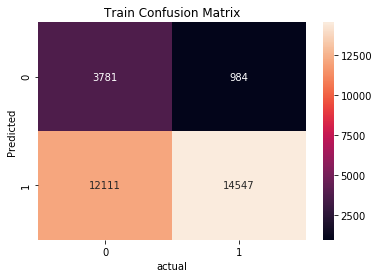

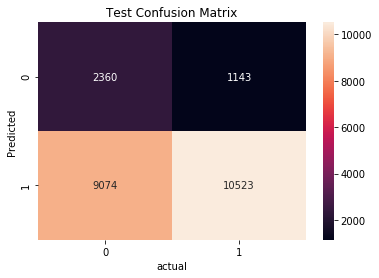

In [77]:
#heatmap confusion matrix https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

confusion = confusion_matrix(y_train, predict_with_best_tfidf(y_train_tfidf_pred, best_tfidf))
df_cm1=pd.DataFrame(confusion)
sns.heatmap(df_cm1,annot=True,fmt="d")

plt.title ("Train Confusion Matrix")
plt.ylabel("Predicted")
plt.xlabel("actual")
plt.show()

confusion = confusion_matrix(y_test, predict_with_best_tfidf(y_test_tfidf_pred, best_tfidf))
df_cm1=pd.DataFrame(confusion)
sns.heatmap(df_cm1,annot=True,fmt="d")

plt.title ("Test Confusion Matrix")
plt.ylabel("Predicted")
plt.xlabel("actual")
plt.show()

## Observations:
<p> DT model with hyper parameter 10 is not a sensible model as TNR rates are very low for Train confusion matrix</p>
<p> DT model with hyper parameter 10 is not a sensible model as TNR rates are very low for Test confusion matrix</p>

### Get all 'False Positive Data Points' 

In [78]:
# https://stackoverflow.com/questions/31324218/scikit-learn-how-to-obtain-true-positive-true-negative-false-positive-and-fal
tfidf_FP_essay_indexes=[]
y_predict_test =  predict_with_best_tfidf(y_test_tfidf_pred, best_tfidf)
for i in range(len(y_predict_test)):
    if y_predict_test[i]==1 and y_test[i]!=y_predict_test[i]: #False Positive: if predicted value is true and actual!=predicted value then enter in to the loop
           tfidf_FP_essay_indexes.append(i) #append the index values

print ("length of False Positives for Test Data are: "+str(len(tfidf_FP_essay_indexes)))
#pass the index values to X_test and store essay in to one array
tfidf_FP_essay =[]
tfidf_FP_price =[]
tfidf_FP_numberofprojects =[]
for k in range(len(tfidf_FP_essay_indexes)):
    tfidf_FP_essay.append(X_test["preprocessed_essays"].values[k])
    tfidf_FP_price.append(X_test["price"].values[k])
    tfidf_FP_numberofprojects.append(X_test["teacher_number_of_previously_posted_projects"].values[k])
    
len(tfidf_FP_essay)

length of False Positives for Test Data are: 1143


1143

### Plot the WordCloud with the words of essay text of false positive data points

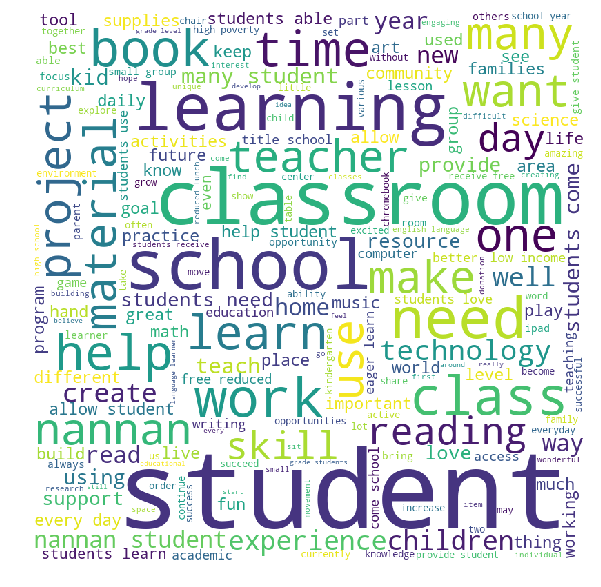

In [79]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/

from wordcloud import WordCloud, STOPWORDS 
comment_words = ' '
stopwords = set(STOPWORDS) 

for val in tfidf_FP_essay: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

### Plot the box plot with the 'price' of 'false positive data points'

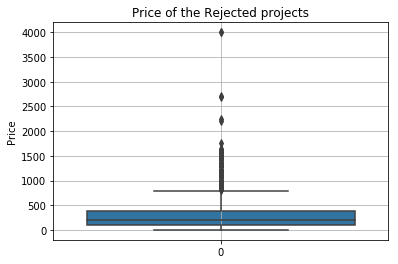

In [80]:
sns.boxplot(data=tfidf_FP_price)
plt.title('Price of the Rejected projects')
plt.ylabel("Price")
plt.grid()
plt.show()


### Plot the pdf with the 'teacher_number_of_previously_posted_projects' of these 'false positive data points

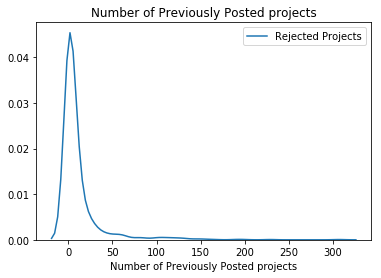

In [81]:
#sns.boxplot(data=tfidf_FP_price)
#plt.title('Words for each essay of the project')
#plt.ylabel("Price")

sns.distplot(tfidf_FP_numberofprojects, hist=False, label="Rejected Projects")
plt.title('Number of Previously Posted projects')
plt.xlabel('Number of Previously Posted projects')
plt.show()


### 2.4.2 Applying DT on TFIDF W2V,<font color='red'> SET 2</font>

### Concatinating all the features for SET 2

In [82]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039

X_tfidfw2v_tr = hstack((X_train_essay_sentiment_neg.T,X_train_essay_sentiment_neu.T,X_train_essay_sentiment_pos.T,X_train_essay_sentiment_compound.T,X_train_number_of_words_project_title.T,X_train_number_of_words_essay.T,X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_cleanc_ohe, X_train_cleansub_ohe , X_train_price_norm.T , X_train_teacherposted_norm.T,X_train_tfidf_w2v_essay,X_train_tfidf_w2v_title)).tocsr()
X_tfidfw2v_cr = hstack((X_cv_essay_sentiment_neg.T,X_cv_essay_sentiment_neu.T,X_cv_essay_sentiment_pos.T,X_cv_essay_sentiment_compound.T,X_cv_number_of_words_project_title.T,X_cv_number_of_words_essay.T,X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_cleanc_ohe, X_cv_cleansub_ohe , X_cv_price_norm.T , X_cv_teacherposted_norm.T,X_cv_tfidf_w2v_essay,X_cv_tfidf_w2v_title)).tocsr()
X_tfidfw2v_te = hstack((X_test_essay_sentiment_neg.T,X_test_essay_sentiment_neu.T,X_test_essay_sentiment_pos.T,X_test_essay_sentiment_compound.T,X_test_number_of_words_project_title.T,X_test_number_of_words_essay.T,X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_cleanc_ohe, X_test_cleansub_ohe , X_test_price_norm.T , X_test_teacherposted_norm.T,X_test_tfidf_w2v_essay,X_test_tfidf_w2v_title)).tocsr()

print("Final Data matrix")
print(X_tfidfw2v_tr.shape, y_train.shape)
print(X_tfidfw2v_cr.shape, y_cv.shape)
print(X_tfidfw2v_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(31423, 707) (31423,)
(15477, 707) (15477,)
(23100, 707) (23100,)


### Applying DT on SET2

In [83]:
parametersK1 = {'max_depth':[1,5,10,50],'min_samples_split':[5,10,100,500]}
tfidfw2vneigh = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'), parametersK1, cv=3, scoring = 'roc_auc',return_train_score=True)
tfidfw2vneigh.fit(X_tfidfw2v_tr,y_train)
tfidfw2vneigh.cv_results_

{'mean_fit_time': array([ 3.21867442,  2.81334281,  2.83599726,  2.8159891 , 12.90035415,
        13.15827298, 13.51465305, 12.87014588, 35.3580749 , 35.27408338,
        34.46070425, 21.55157097, 75.43312391, 75.72661535, 68.16622941,
        23.64873664]),
 'std_fit_time': array([3.04097442e-01, 1.14575458e-02, 6.53081811e-03, 3.26569964e-03,
        2.04790660e-01, 7.47759344e-01, 5.64262616e-01, 5.23563322e-01,
        1.24892220e+00, 1.49689274e+00, 3.66582437e-01, 3.76712676e-01,
        3.46782666e+00, 2.52188730e+00, 4.05588550e+00, 7.72522892e-01]),
 'mean_score_time': array([0.0826567 , 0.07732399, 0.0760026 , 0.07200098, 0.07600013,
        0.08533462, 0.07466904, 0.07867002, 0.0800012 , 0.08132585,
        0.08533231, 0.0799861 , 0.07866923, 0.08265575, 0.0764633 ,
        0.0794541 ]),
 'std_score_time': array([9.98758933e-03, 3.76041802e-03, 3.25159590e-06, 2.48535407e-06,
        2.48232813e-05, 1.32023598e-02, 1.88458310e-03, 1.88699901e-03,
        8.64036192e-03, 5.00

In [84]:
# seaborn heatmap gridsearchcv https://stackoverflow.com/questions/48791709/how-to-plot-a-heat-map-on-pivot-table-after-grid-search

testscore_w2v=pd.pivot_table(pd.DataFrame(tfidfw2vneigh.cv_results_),values='mean_test_score',index='param_max_depth',columns='param_min_samples_split')
print("Mean Test Score")
testscore_w2v

Mean Test Score


param_min_samples_split       5         10        100       500
param_max_depth                                                
1                        0.546478  0.546478  0.546478  0.546478
5                        0.621091  0.621528  0.620776  0.622584
10                       0.583466  0.584201  0.593702  0.614270
50                       0.532715  0.534279  0.567583  0.611777

In [85]:
# seaborn heatmap gridsearchcv https://stackoverflow.com/questions/48791709/how-to-plot-a-heat-map-on-pivot-table-after-grid-search

trainscore_w2v=pd.pivot_table(pd.DataFrame(tfidfw2vneigh.cv_results_),values='mean_train_score',index='param_max_depth',columns='param_min_samples_split')
print("Mean Train SCore")
trainscore_w2v

Mean Train SCore


param_min_samples_split       5         10        100       500
param_max_depth                                                
1                        0.551390  0.551390  0.551390  0.551390
5                        0.685576  0.685576  0.684535  0.679623
10                       0.877866  0.875501  0.828467  0.750475
50                       0.999548  0.999022  0.921278  0.758690

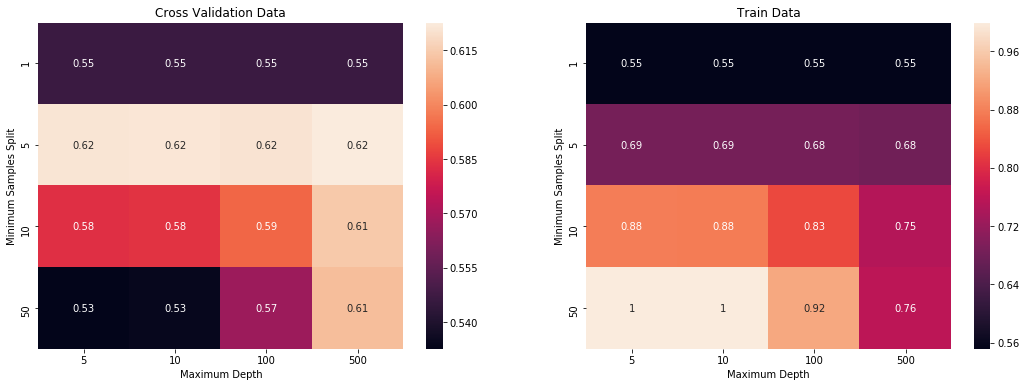

In [86]:
# print sns plot multiple plots  https://stackoverflow.com/questions/38082602/plotting-multiple-different-plots-in-one-figure-using-seaborn
fig, axs = plt.subplots(ncols=2,figsize=(18,6))
sns.heatmap(testscore_w2v,annot = True,ax=axs[0])
sns.heatmap(trainscore_w2v,annot = True,ax=axs[1])

axs[0].set(title='Cross Validation Data',xlabel='Maximum Depth', ylabel='Minimum Samples Split')
axs[1].set(title='Train Data',xlabel='Maximum Depth', ylabel='Minimum Samples Split')

plt.show()


In [87]:
tfidfw2vneigh.best_params_

{'max_depth': 5, 'min_samples_split': 500}

### Find AUC on test and train data

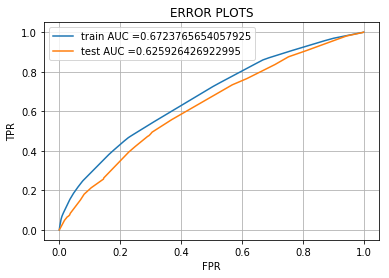

In [88]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


tfidfw2vneigh_auc = DecisionTreeClassifier(class_weight='balanced',max_depth=5,min_samples_split=500)
tfidfw2vneigh_auc.fit(X_tfidfw2v_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_tfidfw2v_pred = tfidfw2vneigh_auc.predict_proba(X_tfidfw2v_tr)[:, 1]
y_test_tfidfw2v_pred = tfidfw2vneigh_auc.predict_proba(X_tfidfw2v_te)[:, 1]

train_tfidfw2v_fpr, train_tfidfw2v_tpr, tr_tfidfw2v_thresholds = roc_curve(y_train, y_train_tfidfw2v_pred)
test_tfidfw2v_fpr, test_tfidfw2v_tpr, te_tfidfw2v_thresholds = roc_curve(y_test, y_test_tfidfw2v_pred)

plt.plot(train_tfidfw2v_fpr, train_tfidfw2v_tpr, label="train AUC ="+str(auc(train_tfidfw2v_fpr, train_tfidfw2v_tpr)))
plt.plot(test_tfidfw2v_fpr, test_tfidfw2v_tpr, label="test AUC ="+str(auc(test_tfidfw2v_fpr, test_tfidfw2v_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

## Observations:
<p>Train Accuray with Hyper Parameter 5 is 67 %</p>
<p>Test Accuray with Hyper Parameter 5 is 62 %</p>


### find best threshold and plot confusion matrix

In [89]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_tfidfw2vhreshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_tfidfw2v(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions
	
print("="*100)
from sklearn.metrics import confusion_matrix
best_tfidfw2v = find_best_tfidfw2vhreshold(tr_tfidfw2v_thresholds, train_tfidfw2v_fpr, train_tfidfw2v_tpr)

the maximum value of tpr*(1-fpr) 0.3769412204821761 for threshold 0.486


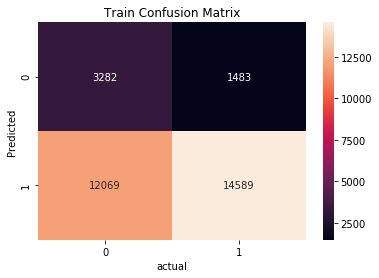

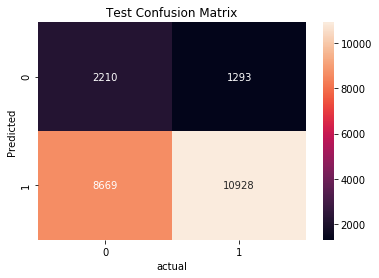

In [90]:
#heatmap confusion matrix https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

confusion = confusion_matrix(y_train, predict_with_best_tfidfw2v(y_train_tfidfw2v_pred, best_tfidfw2v))
df_cm1=pd.DataFrame(confusion)
sns.heatmap(df_cm1,annot=True,fmt="d")

plt.title ("Train Confusion Matrix")
plt.ylabel("Predicted")
plt.xlabel("actual")
plt.show()

confusion = confusion_matrix(y_test, predict_with_best_tfidfw2v(y_test_tfidfw2v_pred, best_tfidfw2v))
df_cm1=pd.DataFrame(confusion)
sns.heatmap(df_cm1,annot=True,fmt="d")

plt.title ("Test Confusion Matrix")
plt.ylabel("Predicted")
plt.xlabel("actual")
plt.show()

## Observations:
<p> DT model with hyper parameter 5 is not a sensible model as TNR rates are very low for Train confusion matrix</p>
<p> DT model with hyper parameter 5 is not a sensible model as TNR rates are very low for Test confusion matrix</p>

### Get all 'False Positive Data Points' 

In [91]:
# https://stackoverflow.com/questions/31324218/scikit-learn-how-to-obtain-true-positive-true-negative-false-positive-and-fal
tfidfw2v_FP_essay_indexes=[]
y_predict_test_w2v =  predict_with_best_tfidfw2v(y_test_tfidfw2v_pred, best_tfidfw2v)
for i in range(len(y_predict_test_w2v)):
    if y_predict_test_w2v[i]==1 and y_test[i]!=y_predict_test_w2v[i]: #False Positive: if predicted value is true and actual!=predicted value then enter in to the loop
           tfidfw2v_FP_essay_indexes.append(i) #append the index values

print ("length of False Positives for Test Data are: "+str(len(tfidfw2v_FP_essay_indexes)))
#pass the index values to X_test and store essay in to one array
tfidfw2v_FP_essay =[]
tfidfw2v_FP_price =[]
tfidfw2v_FP_numberofprojects =[]
for k in range(len(tfidfw2v_FP_essay_indexes)):
    tfidfw2v_FP_essay.append(X_test["preprocessed_essays"].values[k])
    tfidfw2v_FP_price.append(X_test["price"].values[k])
    tfidfw2v_FP_numberofprojects.append(X_test["teacher_number_of_previously_posted_projects"].values[k])
    
len(tfidfw2v_FP_essay)

length of False Positives for Test Data are: 1293


1293

### Plot the WordCloud with the words of essay text of false positive data points

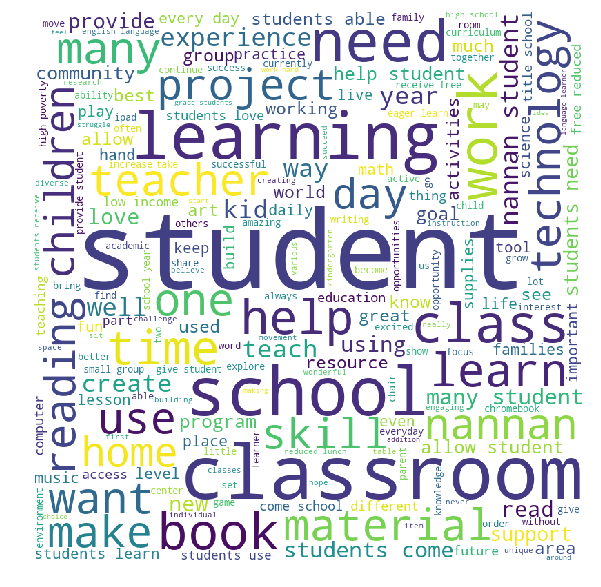

In [92]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/

from wordcloud import WordCloud, STOPWORDS 
comment_words = ' '
stopwords = set(STOPWORDS) 

for val in tfidfw2v_FP_essay: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

### Plot the box plot with the 'price' of 'false positive data points'

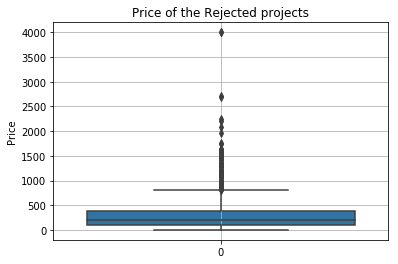

In [93]:
sns.boxplot(data=tfidfw2v_FP_price)
plt.title('Price of the Rejected projects')
plt.ylabel("Price")
plt.grid()
plt.show()


### Plot the pdf with the 'teacher_number_of_previously_posted_projects' of these 'false positive data points

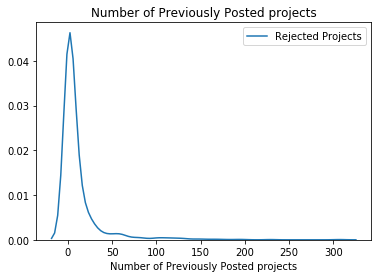

In [94]:
sns.distplot(tfidfw2v_FP_numberofprojects, hist=False, label="Rejected Projects")
plt.title('Number of Previously Posted projects')
plt.xlabel('Number of Previously Posted projects')
plt.show()


<h2>2.4.3 Getting top features using `feature_importances_`</h2>

In [95]:
#https://datascience.stackexchange.com/questions/6683/feature-selection-using-feature-importances-in-random-forests-with-scikit-learn

def selectKImportance(model, X):
     return X[:,model.best_estimator_.feature_importances_[model.best_estimator_.feature_importances_>0].argsort()]

In [96]:
#create a model using DecisionTreeClassifier by keeping the hyper parameter (max_depth=None) to find feature importance

parameters_FI = {'min_samples_split':[5,10,100,500]}
tfidf_featureneigh = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'), parameters_FI, cv=3, scoring = 'roc_auc',return_train_score=True)
tfidf_featureneigh.fit(X_tfidf_tr,y_train)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_split': [5, 10, 100, 500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_s

In [97]:
X_tfidf_tr.shape

(31423, 7824)

In [98]:
X_tfidf_te.shape

(23100, 7824)

In [99]:
# Get non-zero feature importance for Train Data
X_train_bestfeature = selectKImportance(tfidf_featureneigh, X_tfidf_tr)
print(len(tfidf_featureneigh.best_estimator_.feature_importances_[tfidf_featureneigh.best_estimator_.feature_importances_>0]))
print(X_train_bestfeature.shape)

682
(31423, 682)


In [100]:
# Get non-zero feature importance for Test Data
X_test_bestfeature = selectKImportance(tfidf_featureneigh, X_tfidf_te)
X_test_bestfeature.shape

(23100, 682)

### Applying DT on SET1 non-Zero Feature Importance dataset

In [101]:
train_tfidf_feature_auc_l1 = []
cv_tfidf_feature_auc_l1 = []
parametersK = {'max_depth':[1,5,10,50],'min_samples_split':[5,10,100,500]}
tfidf_feature_neigh = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'), parametersK, cv=3, scoring = 'roc_auc',return_train_score=True)
tfidf_feature_neigh.fit(X_train_bestfeature,y_train)
tfidf_feature_neigh.cv_results_

{'mean_fit_time': array([0.10737928, 0.09042462, 0.0960958 , 0.09108893, 0.36536662,
        0.3673617 , 0.36502433, 0.3487459 , 1.03423278, 1.02060294,
        0.91455356, 0.73503232, 5.19243368, 4.93181618, 3.54418755,
        1.90457217]),
 'std_fit_time': array([0.0235071 , 0.00094032, 0.00617537, 0.00046873, 0.00408555,
        0.00489421, 0.00081585, 0.00470821, 0.02691036, 0.02656811,
        0.01039816, 0.01733036, 0.25285   , 0.23519715, 0.20844223,
        0.21936719]),
 'mean_score_time': array([0.02227465, 0.0189507 , 0.01894975, 0.01929299, 0.01962384,
        0.01962423, 0.01961493, 0.01961446, 0.02196407, 0.0206209 ,
        0.01995818, 0.01994848, 0.02128808, 0.02095556, 0.02127735,
        0.020624  ]),
 'std_score_time': array([5.42281026e-03, 7.01885292e-07, 2.42836082e-05, 4.63064997e-04,
        4.76907102e-04, 4.56534829e-04, 4.69853319e-04, 4.70358829e-04,
        1.41922862e-03, 4.56253694e-04, 1.50918940e-05, 1.08386530e-06,
        4.63034921e-04, 1.23380175e-

In [102]:
# seaborn heatmap gridsearchcv https://stackoverflow.com/questions/48791709/how-to-plot-a-heat-map-on-pivot-table-after-grid-search

testscore_feature=pd.pivot_table(pd.DataFrame(tfidf_feature_neigh.cv_results_),values='mean_test_score',index='param_max_depth',columns='param_min_samples_split')
print("Mean Test Score")
testscore_feature

Mean Test Score


param_min_samples_split       5         10        100       500
param_max_depth                                                
1                        0.546478  0.546478  0.546478  0.546478
5                        0.616621  0.616885  0.616445  0.617670
10                       0.607725  0.606835  0.606730  0.614722
50                       0.544050  0.546899  0.565267  0.587397

In [103]:
# seaborn heatmap gridsearchcv https://stackoverflow.com/questions/48791709/how-to-plot-a-heat-map-on-pivot-table-after-grid-search

trainscore_feature=pd.pivot_table(pd.DataFrame(tfidf_feature_neigh.cv_results_),values='mean_train_score',index='param_max_depth',columns='param_min_samples_split')
print("Mean Train SCore")
trainscore_feature

Mean Train SCore


param_min_samples_split       5         10        100       500
param_max_depth                                                
1                        0.551390  0.551390  0.551390  0.551390
5                        0.654614  0.654483  0.653284  0.650465
10                       0.756022  0.753068  0.730166  0.704127
50                       0.983730  0.972283  0.890037  0.790860

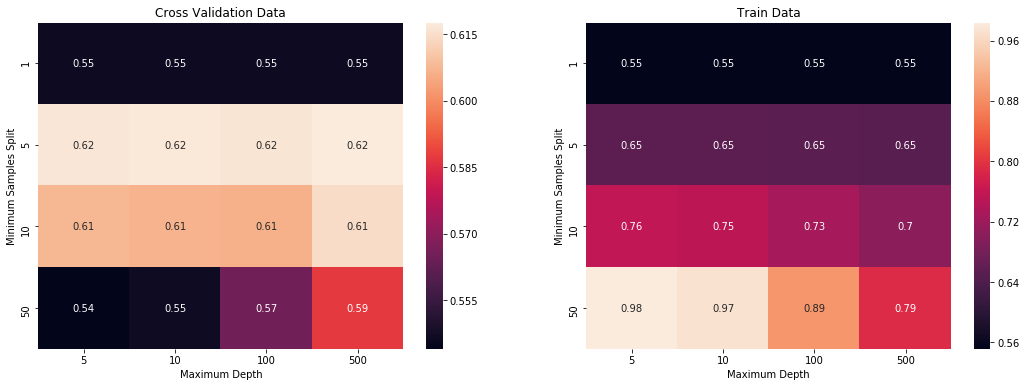

In [104]:

# print sns plot multiple plots  https://stackoverflow.com/questions/38082602/plotting-multiple-different-plots-in-one-figure-using-seaborn
fig, axs = plt.subplots(ncols=2,figsize=(18,6))
sns.heatmap(testscore_feature,annot = True,ax=axs[0])
sns.heatmap(trainscore_feature,annot = True,ax=axs[1])

axs[0].set(title='Cross Validation Data',xlabel='Maximum Depth', ylabel='Minimum Samples Split')
axs[1].set(title='Train Data',xlabel='Maximum Depth', ylabel='Minimum Samples Split')

plt.show()


In [105]:
tfidf_feature_neigh.best_params_

{'max_depth': 5, 'min_samples_split': 500}

### Find AUC on test and train data

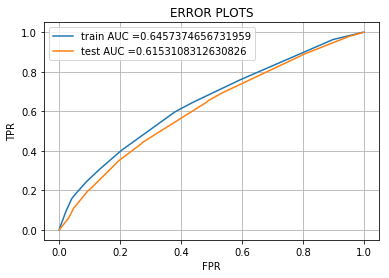

In [114]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

tfidf_featureneigh_auc=''
tfidf_featureneigh_auc = DecisionTreeClassifier(class_weight='balanced',max_depth=5,min_samples_split=500)
tfidf_featureneigh_auc.fit(X_train_bestfeature, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_tfidf_feature_pred = tfidf_featureneigh_auc.predict_proba(X_train_bestfeature)[:, 1]
y_test_tfidf_feature_pred = tfidf_featureneigh_auc.predict_proba(X_test_bestfeature)[:, 1]

train_tfidf_feature_fpr, train_tfidf_feature_tpr, tr_tfidf_feature_thresholds = roc_curve(y_train, y_train_tfidf_feature_pred)
test_tfidf_feature_fpr, test_tfidf_feature_tpr, te_tfidf_feature_thresholds = roc_curve(y_test, y_test_tfidf_feature_pred)

plt.plot(train_tfidf_feature_fpr, train_tfidf_feature_tpr, label="train AUC ="+str(auc(train_tfidf_feature_fpr, train_tfidf_feature_tpr)))
plt.plot(test_tfidf_feature_fpr, test_tfidf_feature_tpr, label="test AUC ="+str(auc(test_tfidf_feature_fpr, test_tfidf_feature_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

## Observations:
<p>Train Accuray with Hyper Parameter 5 is 64 %</p>
<p>Test Accuray with Hyper Parameter 5 is 61 %</p>


### find best threshold and plot confusion matrix

In [107]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_tfidf_featurehreshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_tfidf_feature(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions
	
print("="*100)
from sklearn.metrics import confusion_matrix
best_tfidf_feature = find_best_tfidf_featurehreshold(tr_tfidf_feature_thresholds, train_tfidf_feature_fpr, train_tfidf_feature_tpr)

the maximum value of tpr*(1-fpr) 0.4237074767032759 for threshold 0.486


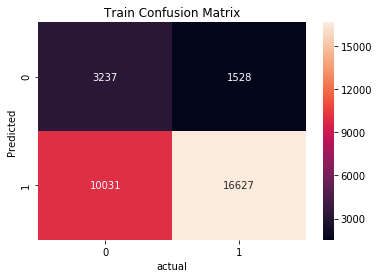

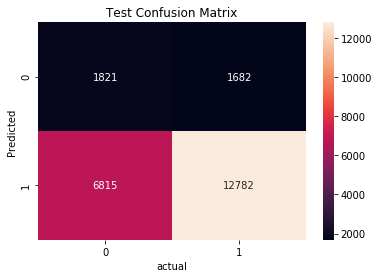

In [108]:
#heatmap confusion matrix https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

confusion = confusion_matrix(y_train, predict_with_best_tfidf_feature(y_train_tfidf_feature_pred, best_tfidf_feature))
df_cm1=pd.DataFrame(confusion)
sns.heatmap(df_cm1,annot=True,fmt="d")

plt.title ("Train Confusion Matrix")
plt.ylabel("Predicted")
plt.xlabel("actual")
plt.show()

confusion = confusion_matrix(y_test, predict_with_best_tfidf_feature(y_test_tfidf_feature_pred, best_tfidf_feature))
df_cm1=pd.DataFrame(confusion)
sns.heatmap(df_cm1,annot=True,fmt="d")

plt.title ("Test Confusion Matrix")
plt.ylabel("Predicted")
plt.xlabel("actual")
plt.show()

## Observations:
<p> DT model with hyper parameter 5 is not a sensible model as TNR rates are very low for Train confusion matrix</p>
<p> DT model with hyper parameter 5 is not a sensible model as TNR rates are very low for Test confusion matrix</p>

### Get all 'False Positive Data Points' 

In [109]:
# https://stackoverflow.com/questions/31324218/scikit-learn-how-to-obtain-true-positive-true-negative-false-positive-and-fal
tfidf_feature_FP_essay_indexes=[]
y_predict_test =  predict_with_best_tfidf_feature(y_test_tfidf_feature_pred, best_tfidf_feature)
for i in range(len(y_predict_test)):
    if y_predict_test[i]==1 and y_test[i]!=y_predict_test[i]: #False Positive: if predicted value is true and actual!=predicted value then enter in to the loop
           tfidf_feature_FP_essay_indexes.append(i) #append the index values

print ("length of False Positives for Test Data are: "+str(len(tfidf_feature_FP_essay_indexes)))
#pass the index values to X_test and store essay in to one array
tfidf_feature_FP_essay =[]
tfidf_feature_FP_price =[]
tfidf_feature_FP_numberofprojects =[]
for k in range(len(tfidf_feature_FP_essay_indexes)):
    tfidf_feature_FP_essay.append(X_test["preprocessed_essays"].values[k])
    tfidf_feature_FP_price.append(X_test["price"].values[k])
    tfidf_feature_FP_numberofprojects.append(X_test["teacher_number_of_previously_posted_projects"].values[k])
    
len(tfidf_feature_FP_essay)

length of False Positives for Test Data are: 1682


1682

### Plot the WordCloud with the words of essay text of false positive data points

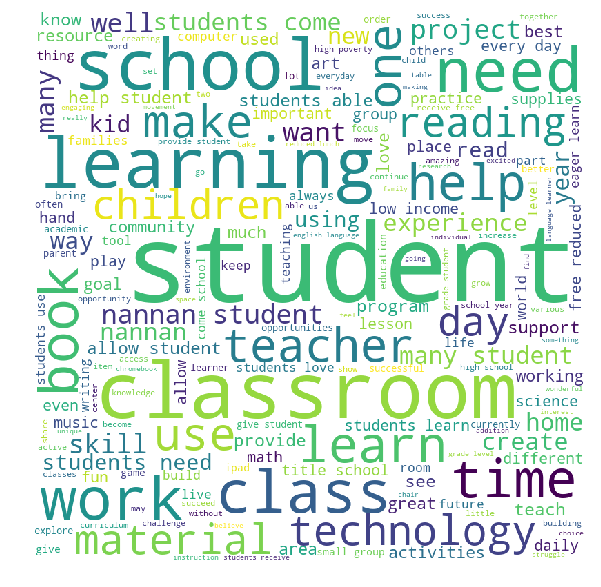

In [110]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/

from wordcloud import WordCloud, STOPWORDS 
comment_words = ' '
stopwords = set(STOPWORDS) 

for val in tfidf_feature_FP_essay: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

### Plot the box plot with the 'price' of 'false positive data points'

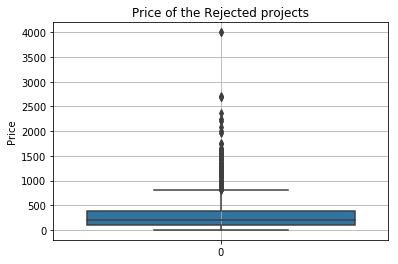

In [111]:
sns.boxplot(data=tfidf_feature_FP_price)
plt.title('Price of the Rejected projects')
plt.ylabel("Price")
plt.grid()
plt.show()


### Plot the pdf with the 'teacher_number_of_previously_posted_projects' of these 'false positive data points

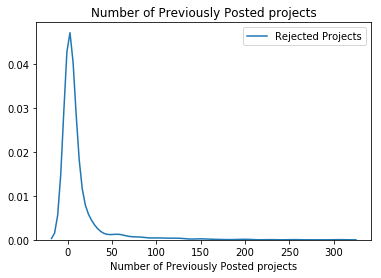

In [112]:
sns.distplot(tfidf_feature_FP_numberofprojects, hist=False, label="Rejected Projects")
plt.title('Number of Previously Posted projects')
plt.xlabel('Number of Previously Posted projects')
plt.show()


<h1>2. Summary</h1>

In [118]:
from prettytable import PrettyTable
    
Finaloutput = PrettyTable()

Finaloutput.field_names = ["Vectorizer", "Model", "Hyper Parameter", "Mininum Sample Split","AUC"]


Finaloutput.add_row(["TFIDF", "Decision Tree", 10, 500,str(auc(train_tfidf_fpr, train_tfidf_tpr))])
Finaloutput.add_row(["TFIDFW2V", "Decision Tree", 5, 500,str(auc(train_tfidfw2v_fpr, train_tfidfw2v_tpr))])
Finaloutput.add_row(["TFIDF-Non Zero Features", "Decision Tree", 5, 500,str(auc(train_tfidf_feature_fpr, train_tfidf_feature_tpr))])

print(Finaloutput)

+-------------------------+---------------+-----------------+----------------------+--------------------+
|        Vectorizer       |     Model     | Hyper Parameter | Mininum Sample Split |        AUC         |
+-------------------------+---------------+-----------------+----------------------+--------------------+
|          TFIDF          | Decision Tree |        10       |         500          | 0.7255745958464832 |
|         TFIDFW2V        | Decision Tree |        5        |         500          | 0.6723765654057925 |
| TFIDF-Non Zero Features | Decision Tree |        5        |         500          | 0.6457374656731959 |
+-------------------------+---------------+-----------------+----------------------+--------------------+


## Observation
<p> TFIDF vetorizer has given more AUC score compare with other Vectorizers with the Hyper Parameter 10 using Decision Trees</p>